# Exploratory Data Analytics (EDA)

### Methodology / Explorations

For each country / job:
1. Explore how jobs are split by location (using count)
2. See the proportion of jobs that offer work from home, require a degree or offer health insurance
3. Find how jobs are split by company (using count)

NOTE: all explorations will focus on the following: 
- Roles: 
  - Data Analyst
  - Data Engineer
  - Data Scientist
- Countries: 
  - United Kingdom
  - United States
  - India

### Import Libraries

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Vikram Kapoor\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter Dataset for Specified Roles and Countries

In [2]:
# List Containing Job Roles: Data Analyst, Data Engineer, Data Science
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# List Containing Countries: United Kingdom, United States, India
countries = ['United Kingdom', 'United States', 'India']

# Filter the Dataset for Job Roles and Countries
df_job_ctry = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'].isin(countries))]

## Part 1 - Explore How Jobs are Split by Location

### Obtain a Table Showing the Number of Jobs in Each Location, in Each Country for Each Job

In [3]:
# Obtain No. of Jobs in Each Location
df_job_loc = df_job_ctry.pivot_table(index=["job_country", "job_location"], columns="job_title_short", aggfunc="size")
df_job_loc

job_title_short                                       Data Analyst  \
job_country   job_location                                           
India         Abu Road, Rajasthan, India                       NaN   
              Addanki South U, Andhra Pradesh, India           NaN   
              Adilabad, Telangana, India                       NaN   
              Agartala, Tripura, India                         NaN   
              Agra, Uttar Pradesh, India                       NaN   
...                                                            ...   
United States Zelienople, PA                                   NaN   
              Zephyrhills, FL                                  1.0   
              Zion, IL                                         4.0   
              Zion, PA                                         NaN   
              Zionsville, IN                                   8.0   

job_title_short                                       Data Engineer  \
job_country   job_location                                            
India         Abu Road, Rajasthan, India                        2.0   
              Addanki South U, Andhra Pradesh, India            NaN   
              Adilabad, Telangana, India                        NaN   
              Agartala, Tripura, India                          2.0   
              Agra, Uttar Pradesh, India                        6.0   
...                                                             ...   
United States Zelienople, PA                                    NaN   
              Zephyrhills, FL                                   NaN   
              Zion, IL                                          NaN   
              Zion, PA                                          1.0   
              Zionsville, IN                                    NaN   

job_title_short                                       Data Scientist  
job_country   job_location                                            
India         Abu Road, Rajasthan, India                         NaN  
              Addanki South U, Andhra Pradesh, India             1.0  
              Adilabad, Telangana, India                         3.0  
              Agartala, Tripura, India                           NaN  
              Agra, Uttar Pradesh, India                         1.0  
...                                                              ...  
United States Zelienople, PA                                     2.0  
              Zephyrhills, FL                                    NaN  
              Zion, IL                                           1.0  
              Zion, PA                                           NaN  
              Zionsville, IN                                     3.0  

[6743 rows x 3 columns]

In [4]:
# Reset Index So Filters can be Carried Out
df_job_loc = df_job_loc.reset_index()

### Create an Ordered Table for Each Country & Job

In [5]:
# Filter for India
df_job_ind = df_job_loc[df_job_loc['job_country'] == 'India']

# Order for Data Analyst Count
df_da_ind = df_job_ind.sort_values(by = 'Data Analyst', ascending = False)

# Specify Columns & Top 10
df_da_ind = df_da_ind.iloc[:, [1, 2]].head(10)
df_da_ind



job_title_short,job_location,Data Analyst
191,India,2056.0
183,"Hyderabad, Telangana, India",1289.0
22,Anywhere,1052.0
52,"Bengaluru, Karnataka, India",355.0
266,"Maharashtra, India",203.0
291,"Mumbai, Maharashtra, India",133.0
345,"Pune, Maharashtra, India",119.0
161,"Gurugram, Haryana, India",108.0
91,"Chennai, Tamil Nadu, India",106.0
383,"Secunderabad, Telangana, India",84.0


In [6]:
# Order for Data Engineer Count
df_de_ind = df_job_ind.sort_values(by = 'Data Engineer', ascending = False)

# Specify Columns & Top 10
df_de_ind = df_de_ind.iloc[:, [1, 3]].head(10)
df_de_ind

job_title_short,job_location,Data Engineer
52,"Bengaluru, Karnataka, India",5036.0
183,"Hyderabad, Telangana, India",2269.0
22,Anywhere,1881.0
191,India,1855.0
345,"Pune, Maharashtra, India",1628.0
91,"Chennai, Tamil Nadu, India",1390.0
291,"Mumbai, Maharashtra, India",928.0
161,"Gurugram, Haryana, India",920.0
316,"New Delhi, Delhi, India",461.0
322,"Noida, Uttar Pradesh, India",390.0


In [7]:
# Order for Data Science Count
df_ds_ind = df_job_ind.sort_values(by = 'Data Scientist', ascending = False)

# Specify Columns & Top 10
df_ds_ind = df_ds_ind.iloc[:, [1, 4]].head(10)
df_ds_ind

job_title_short,job_location,Data Scientist
52,"Bengaluru, Karnataka, India",3465.0
191,India,1602.0
183,"Hyderabad, Telangana, India",1218.0
22,Anywhere,1031.0
291,"Mumbai, Maharashtra, India",920.0
345,"Pune, Maharashtra, India",917.0
91,"Chennai, Tamil Nadu, India",857.0
161,"Gurugram, Haryana, India",699.0
316,"New Delhi, Delhi, India",508.0
322,"Noida, Uttar Pradesh, India",426.0


In [8]:
# Filter for United States
df_job_us = df_job_loc[df_job_loc['job_country'] == 'United States']

# Order for Data Analyst Count
df_da_us = df_job_us.sort_values(by = 'Data Analyst', ascending = False)

# Specify Columns & Top 10
df_da_us = df_da_us.iloc[:, [1, 2]].head(10)
df_da_us

job_title_short,job_location,Data Analyst
1826,Anywhere,5106.0
4854,"New York, NY",3035.0
1893,"Atlanta, GA",2741.0
2565,"Chicago, IL",2337.0
1944,"Austin, TX",1919.0
2803,"Dallas, TX",1862.0
6433,"Washington, DC",1592.0
2529,"Charlotte, NC",1433.0
6113,"Tampa, FL",1431.0
4291,"Los Angeles, CA",1328.0


In [9]:
# Order for Data Engineer Count
df_de_us = df_job_us.sort_values(by = 'Data Engineer', ascending = False)

# Specify Columns & Top 10
df_de_us = df_de_us.iloc[:, [1, 3]].head(10)
df_de_us

job_title_short,job_location,Data Engineer
1826,Anywhere,6285.0
4854,"New York, NY",1212.0
6275,United States,1111.0
2803,"Dallas, TX",835.0
1893,"Atlanta, GA",764.0
2565,"Chicago, IL",714.0
1944,"Austin, TX",619.0
6433,"Washington, DC",611.0
2529,"Charlotte, NC",599.0
3795,"Houston, TX",511.0


In [10]:
# Order for Data Scientist Count
df_ds_us = df_job_us.sort_values(by = 'Data Scientist', ascending = False)

# Specify Columns & Top 10
df_ds_us = df_ds_us.iloc[:, [1, 4]].head(10)
df_ds_us

job_title_short,job_location,Data Scientist
1826,Anywhere,6126.0
6275,United States,2667.0
4854,"New York, NY",1911.0
1893,"Atlanta, GA",1787.0
6433,"Washington, DC",1695.0
5681,"San Francisco, CA",1612.0
2565,"Chicago, IL",980.0
4291,"Los Angeles, CA",833.0
1858,"Arlington, VA",749.0
2529,"Charlotte, NC",737.0


In [11]:
# Filter for United Kingdom
df_job_uk = df_job_loc[df_job_loc['job_country'] == 'United Kingdom']

# Order for Data Analyst Count
df_da_uk = df_job_uk.sort_values(by = 'Data Analyst', ascending = False)

# Specify Columns & Top 10
df_da_uk = df_da_uk.iloc[:, [1, 2]].head(10)
df_da_uk

job_title_short,job_location,Data Analyst
1559,United Kingdom,1989.0
500,Anywhere,959.0
867,"England, UK",610.0
1182,"Manchester, UK",595.0
586,"Birmingham, UK",440.0
1108,"Leeds, UK",416.0
851,"Edinburgh, UK",319.0
1146,"London, UK",315.0
922,"Glasgow, UK",225.0
1245,"Newcastle upon Tyne, UK",194.0


In [12]:
# Order for Data Engineer Count
df_de_uk = df_job_uk.sort_values(by = 'Data Engineer', ascending = False)

# Specify Columns & Top 10
df_de_uk = df_de_uk.iloc[:, [1, 3]].head(10)
df_de_uk

job_title_short,job_location,Data Engineer
1146,"London, UK",3978.0
1559,United Kingdom,1166.0
500,Anywhere,1063.0
867,"England, UK",443.0
1182,"Manchester, UK",426.0
649,"Bristol, UK",275.0
586,"Birmingham, UK",255.0
1108,"Leeds, UK",238.0
851,"Edinburgh, UK",166.0
1245,"Newcastle upon Tyne, UK",125.0


In [13]:
# Order for Data Scientist Count
df_ds_uk = df_job_uk.sort_values(by = 'Data Scientist', ascending = False)

# Specify Columns & Top 10
df_ds_uk = df_ds_uk.iloc[:, [1, 4]].head(10)
df_ds_uk

job_title_short,job_location,Data Scientist
1146,"London, UK",3550.0
1559,United Kingdom,982.0
500,Anywhere,808.0
867,"England, UK",344.0
1182,"Manchester, UK",329.0
1108,"Leeds, UK",177.0
649,"Bristol, UK",172.0
586,"Birmingham, UK",134.0
679,"Cambridge, UK",113.0
851,"Edinburgh, UK",109.0


### Create a Visualisation for the Job Posting Count for Each Location (by Country and Job Title)

In [14]:
## Re-Run Key Code Necessary for Plot

# List Containing Job Roles: Data Analyst, Data Engineer, Data Science
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# List Containing Countries: United Kingdom, United States, India
countries = ['United Kingdom', 'United States', 'India']

# Filter the Dataset for Job Roles and Countries
df_job_ctry = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'].isin(countries))]

# Obtain No. of Jobs in Each Location
df_job_loc = df_job_ctry.pivot_table(index=["job_country", "job_location"], columns="job_title_short", aggfunc="size")

# Reset Index So Filters can be Carried Out
df_job_loc = df_job_loc.reset_index()

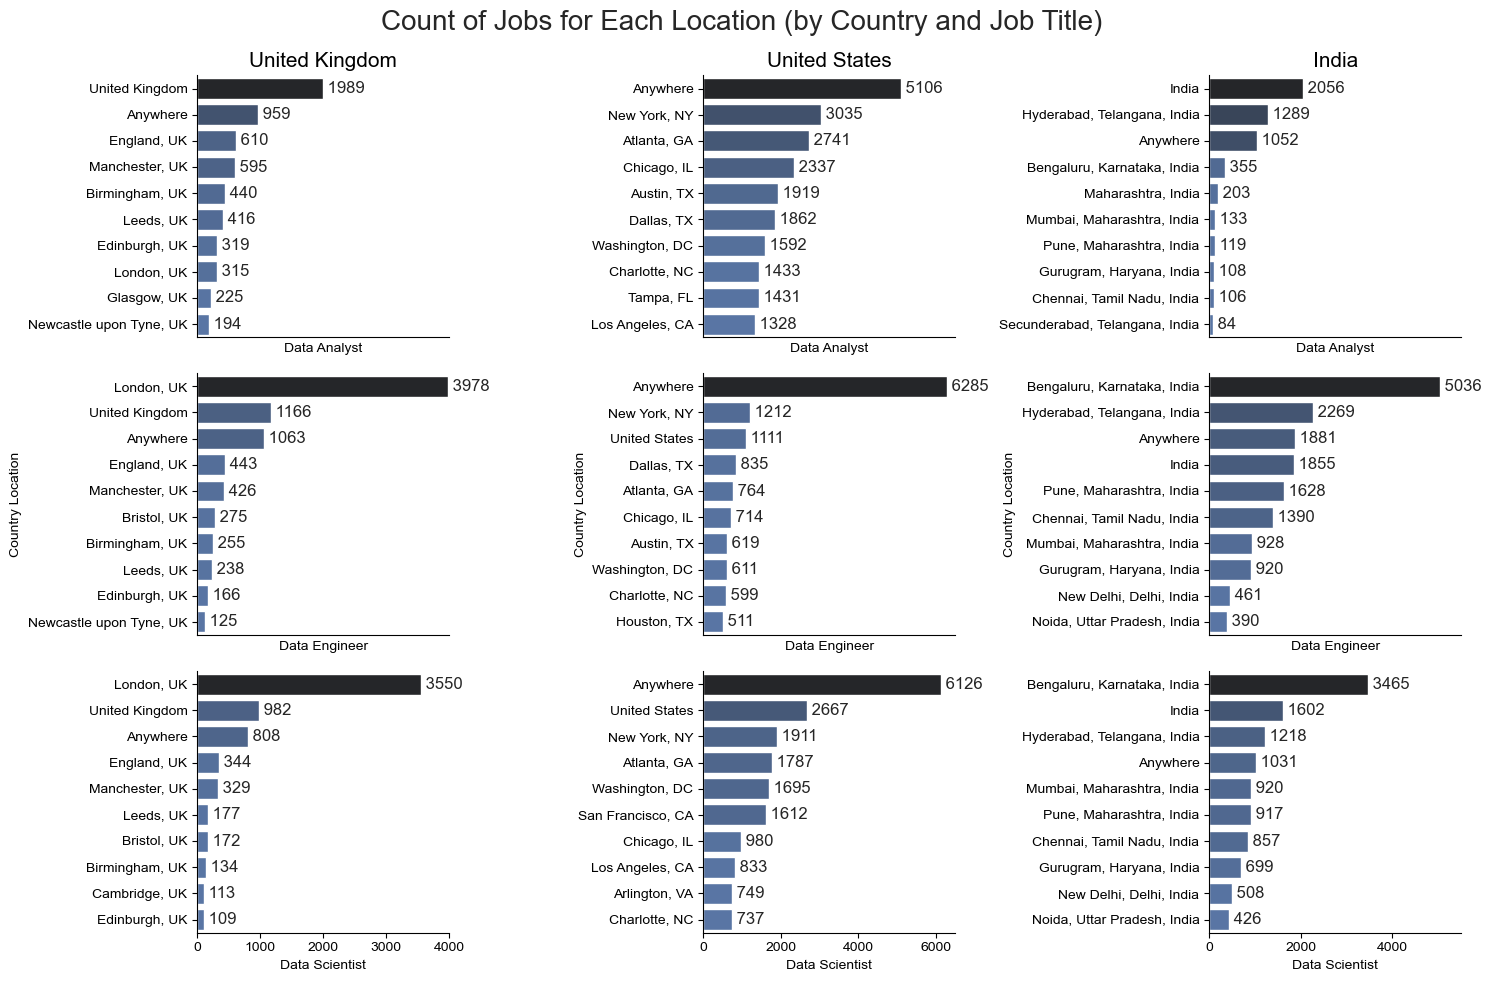

In [15]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filter and Orders the Job Location Tables Using the Loop to Adjust the Filters Accordingly 
        df_plot = df_job_loc[df_job_loc['job_country'] == country]
        df_plot = df_plot.sort_values(by = job_title, ascending = False).head(10)
    
# Creation of the Chart Using Seaborn
        sns.barplot(
        data = df_plot,
        x = job_title,
        y = 'job_location',
        ax = ax[i, j],
        hue = job_title,
        palette = 'dark:b_r',
        legend = False
    )

# Create Chart Titles for Top Row Only to Distinguish Column for Countries
        ax[0, j].set_title(countries[j], fontsize = 15)

# Creates y-Axis Titles for Middle Charts
        if i == 1:
            ax[i, j].set_ylabel('Country Location')
        else:
            ax[i, j].set_ylabel('')

# Set Limits for X-Axis to Extend to (To Scale for Each Country)
        ax[i, 0].set_xlim(0, 4000)
        ax[i, 1].set_xlim(0, 6500)
        ax[i, 2].set_xlim(0, 5500)

# Removes the x-Axis Scale for Top and Middle Row Charts
        if i != len(job_titles) - 1:
            ax[i, j].set_xticks([])

# Adds Numbers to Side of Bar for Clarity (No Need for Naked Eye Check)
        for n, v in enumerate(df_plot[job_title]):
            ax[i, j].text(v + 1, n, f'{v: .0f}', va = 'center')
            
sns.despine()
fig.suptitle('Count of Jobs for Each Location (by Country and Job Title)', fontsize = 20)
plt.tight_layout()
plt.show()

## Part 2 - See the Proportion of Data Jobs that Offer Work From Home, Require a Degree or Offer Health Insurance

### Plot the Proportion of Jobs That Allow Work From Home (by Country and Job Title)

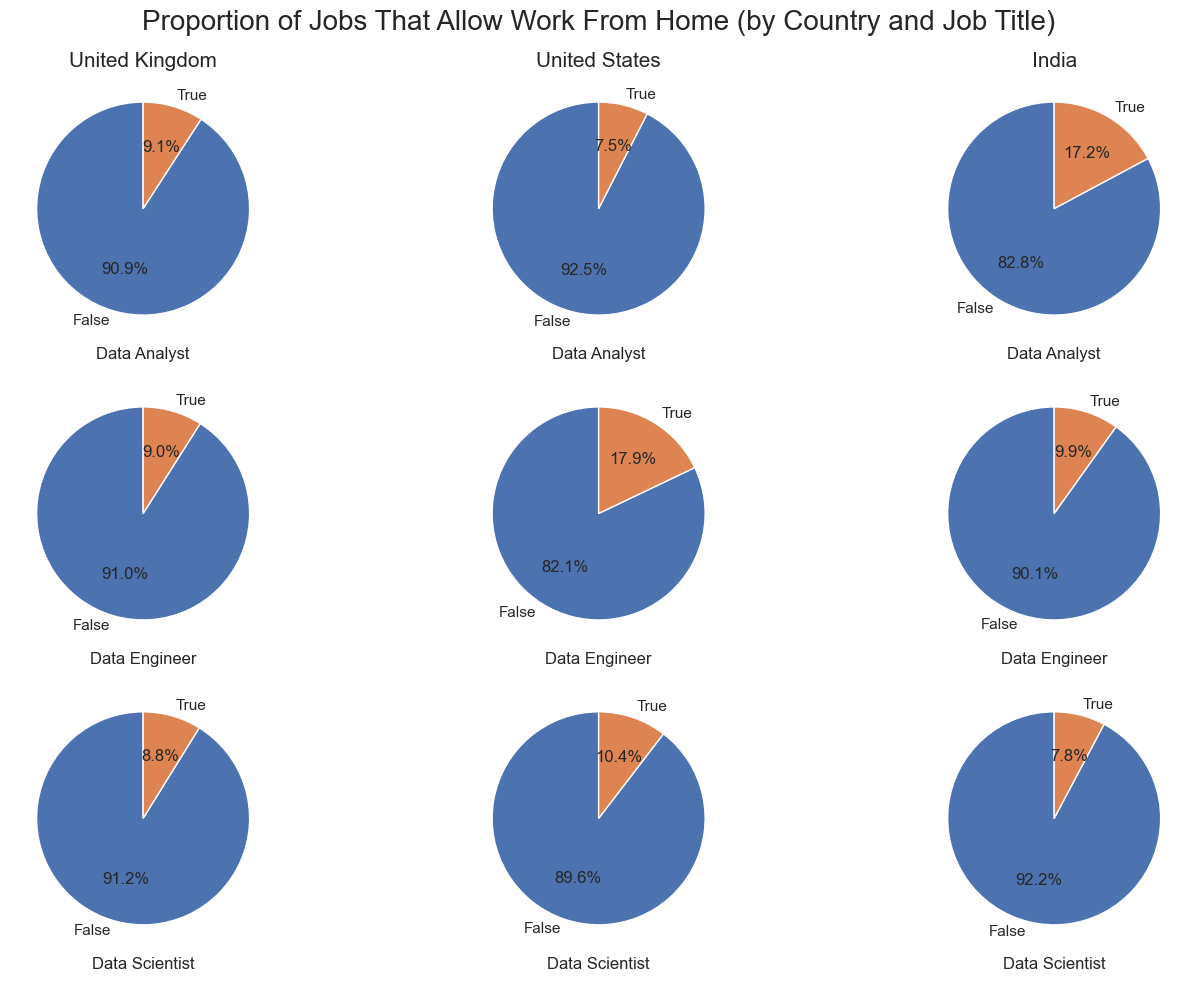

In [16]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters by Country and Job Title
        df_plot = df_job_ctry[df_job_ctry['job_country'] == country]
        df_plot = df_plot[df_plot['job_title_short'] == job_title]

# Creation of Chart Using Seaborn
        ax[i, j].pie(
        df_plot['job_work_from_home'].value_counts(),
        labels = ['False', 'True'],
        autopct = '%1.1f%%',
        startangle = 90
        )

# Creates x-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_title)

# Create Chart Titles for Top Row Only to Distinguish Column for Countries 
        ax[0, j].set_title(country, fontsize = 15)
        
fig.suptitle('Proportion of Jobs That Allow Work From Home (by Country and Job Title)', fontsize = 20)
plt.tight_layout()
plt.show()

### Plot the Proportion of Jobs That Require a Degree (by Country and Job Title)

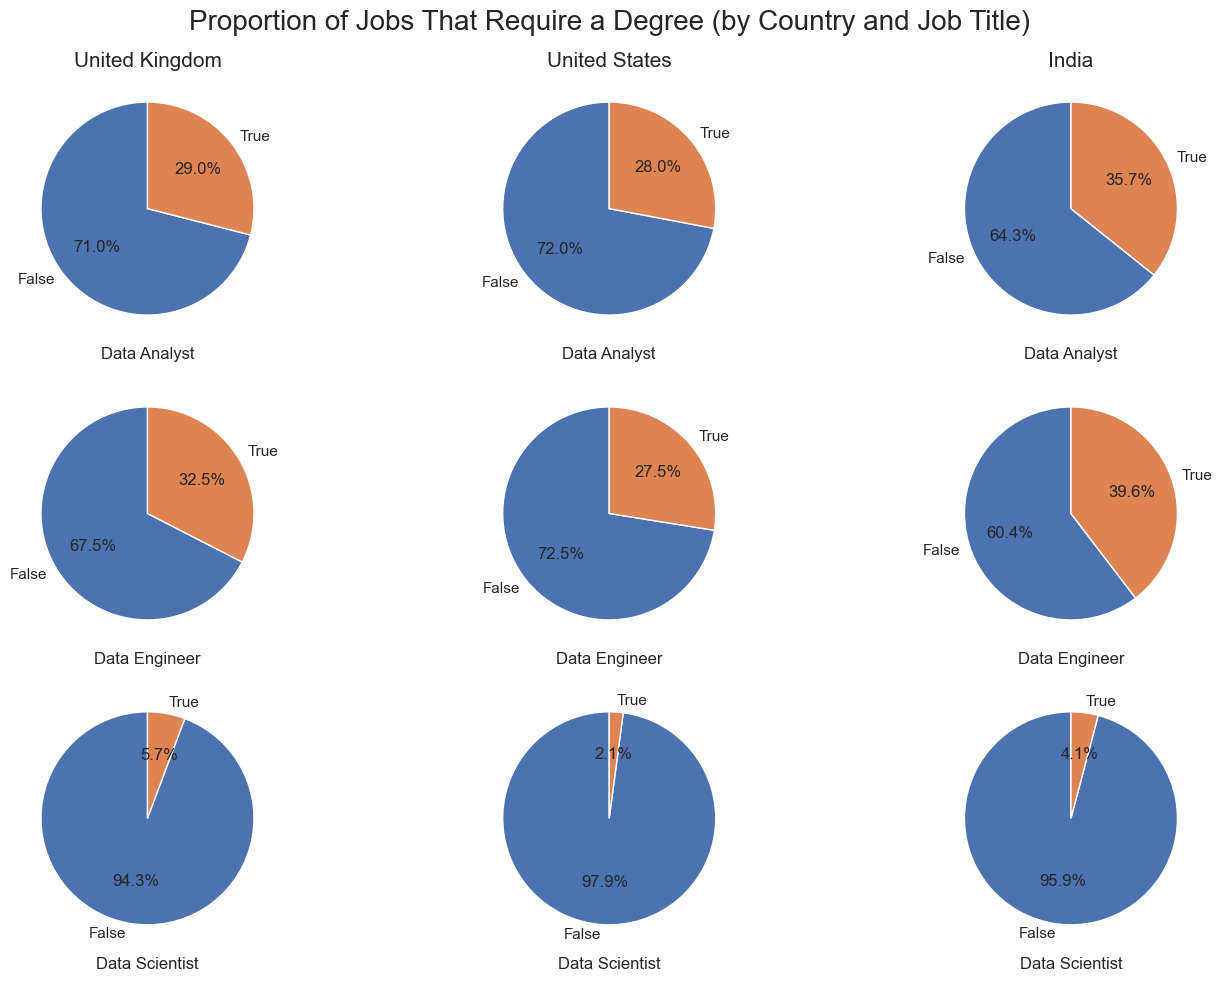

In [17]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters by Country and Job Title
        df_plot = df_job_ctry[df_job_ctry['job_country'] == country]
        df_plot = df_plot[df_plot['job_title_short'] == job_title]

# Creation of Chart Using Seaborn
        ax[i, j].pie(
        df_plot['job_no_degree_mention'].value_counts(),
        labels = ['False', 'True'],
        autopct = '%1.1f%%',
        startangle = 90
        )

# Creates x-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_title)

# Create Chart Titles for Top Row Only to Distinguish Column for Countries 
        ax[0, j].set_title(country, fontsize = 15)
        
fig.suptitle('Proportion of Jobs That Require a Degree (by Country and Job Title)', fontsize = 20)
plt.tight_layout()
plt.show()

### Plot the Proportion of Jobs That Provide Health Insurance (by Country and Job Title) 'job_health_insurance'

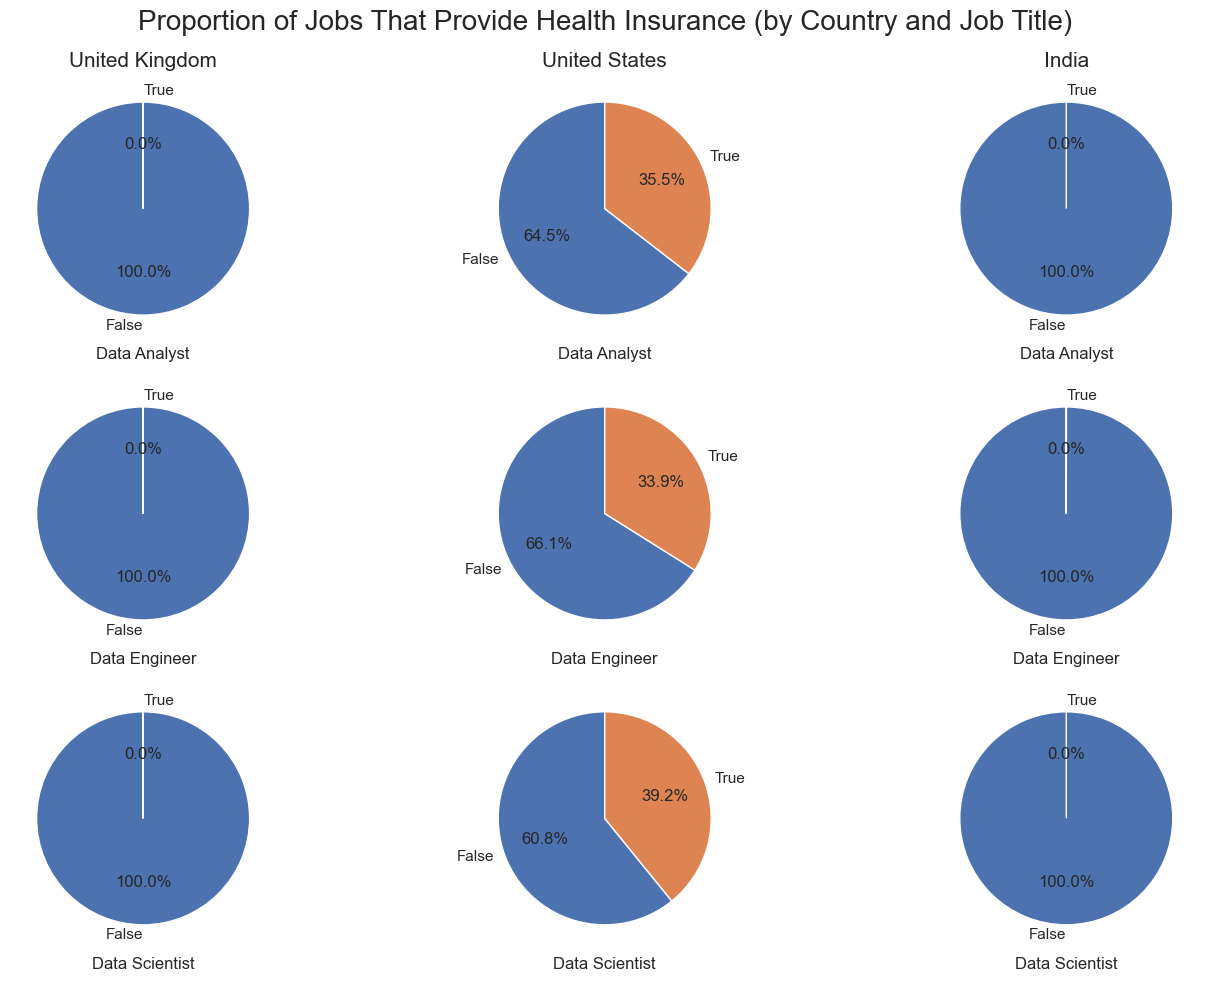

In [18]:
# Setup Figure
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters by Country and Job Title
        df_plot = df_job_ctry[df_job_ctry['job_country'] == country]
        df_plot = df_plot[df_plot['job_title_short'] == job_title]

# Creation of Chart Using Seaborn
        ax[i, j].pie(
        df_plot['job_health_insurance'].value_counts().reindex([False, True], fill_value = 0),
        labels = ['False', 'True'],
        autopct = '%1.1f%%',
        startangle = 90
        )

# Creates x-Axis Titles for All Charts
        ax[i, j].set_xlabel(job_title)

# Create Chart Titles for Top Row Only to Distinguish Column for Countries 
        ax[0, j].set_title(country, fontsize = 15)

fig.suptitle('Proportion of Jobs That Provide Health Insurance (by Country and Job Title)', fontsize = 20)
plt.tight_layout()
plt.show()

## Part 3 - Find How Data Jobs are Split by Company (Using Count)

In [19]:
## Obtain Key Code Necessary for Plot and Re-Purpose for Company Names

# List Containing Job Roles: Data Analyst, Data Engineer, Data Science
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# List Containing Countries: United Kingdom, United States, India
countries = ['United Kingdom', 'United States', 'India']

# Filter the Dataset for Job Roles and Countries
df_job_ctry = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'].isin(countries))]

# Obtain No. of Jobs in Each Company
df_job_comp = df_job_ctry.pivot_table(index=["job_country", "company_name"], columns="job_title_short", aggfunc="size")

# Reset Index So Filters can be Carried Out
df_job_comp = df_job_comp.reset_index()

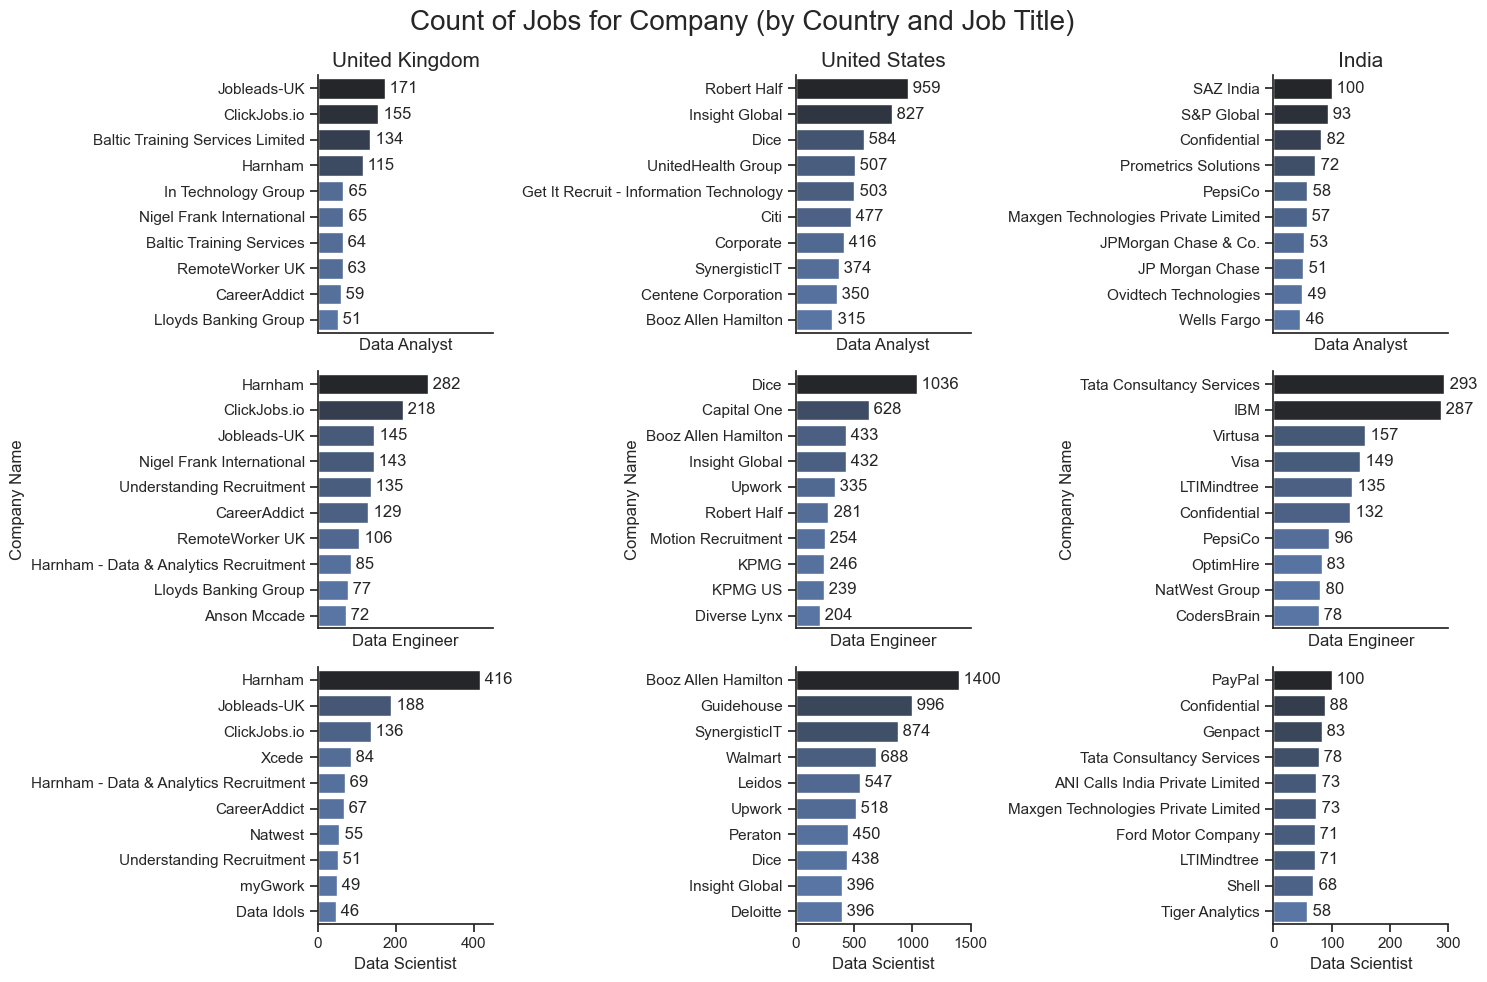

In [20]:
# Setup Figure 
fig, ax = plt.subplots(len(job_titles), len(countries), figsize = (15, 10))

# Set Theme Using Seaborn
sns.set_theme(style = 'ticks')

# Will Loop Through Lists (Job Titles & Countries) a Bit Like V-Lookup
for i, job_title in enumerate(job_titles):
    for j, country in enumerate(countries):

# Filters and Orders the Company Count Table Using the Loop to Adjust the Filters Accordingly 
        df_plot = df_job_comp[df_job_comp['job_country'] == country]
        df_plot = df_plot.sort_values(by = job_title, ascending = False).head(10)

# Creation of the Chart Using Seaborn 
        sns.barplot(
        data = df_plot,
        x = job_title,
        y = 'company_name',
        ax = ax[i, j],
        hue = job_title,
        palette = 'dark:b_r',
        legend = False
    )
        
# Create Chart Titles for Top Row Only to Distinguish Column for Countries
        ax[0, j].set_title(countries[j], fontsize = 15)

# Creates y-Axis Title for Middle Charts
        if i == 1:
            ax[i, j].set_ylabel('Company Name')
        else:
            ax[i, j].set_ylabel('')

# Sets Limits for x-Axis Titles for All Charts
        ax[i, 0].set_xlim(0, 450)
        ax[i, 1].set_xlim(0, 1500)
        ax[i, 2].set_xlim(0, 300)

# Removes the x-Axis Scale for Top and Middle Row Charts
        if i != len(job_titles) - 1:
            ax[i, j].set_xticks([])

# Adds Numbers to Side of Bar for Clarity (No Need for Naked Eye Check)
        for n, v in enumerate(df_plot[job_title]):
            ax[i, j].text(v + 1, n, f'{v: .0f}', va = 'center')

sns.despine()
fig.suptitle('Count of Jobs for Company (by Country and Job Title)', fontsize = 20)
plt.tight_layout()
plt.show()